In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# scaler and encoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict, cross_validate

from datetime import datetime


from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor ,VotingRegressor


plt.style.use('seaborn')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test =  pd.read_csv('test.csv')
sub =   pd.read_csv('sample_submission.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11121 entries, 0 to 11120
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       11121 non-null  int64 
 1   user_id      11121 non-null  int64 
 2   category_id  11121 non-null  int64 
 3   video_id     11121 non-null  int64 
 4   age          11121 non-null  int64 
 5   gender       11121 non-null  object
 6   profession   11121 non-null  object
 7   followers    11121 non-null  int64 
 8   views        11121 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 782.1+ KB


In [5]:
sub.head()

,row_id,engagement_score
0,89198,5.0
1,89199,5.0
2,89200,5.0
3,89201,5.0
4,89202,5.0


In [6]:
sub.tail()


,row_id,engagement_score
11116,100314,5.0
11117,100315,5.0
11118,100316,5.0
11119,100317,5.0
11120,100318,5.0


In [7]:
train.columns

Index(['row_id', 'user_id', 'category_id', 'video_id', 'age', 'gender',
       'profession', 'followers', 'views', 'engagement_score'],
      dtype='object')

In [8]:
train.describe()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,44599.000000,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,25749.100318,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,22300.000000,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,44599.000000,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,66898.000000,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,89197.000000,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


<AxesSubplot:>

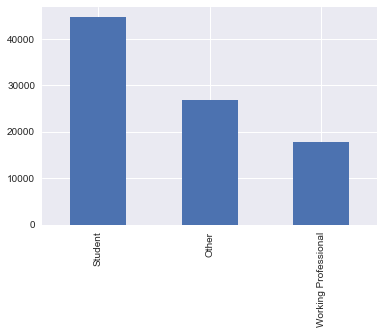

In [12]:
train['profession'].value_counts().plot(kind='bar')

<AxesSubplot:>

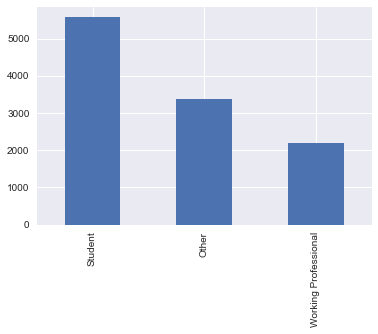

In [13]:
test['profession'].value_counts().plot(kind='bar')

### EDA 

In [14]:
df_train = train.copy()
df_test = test.copy()

In [15]:
df_train['type'] = 'Train'
df_test['type'] = 'Test'
df = df_train.append(df_test) # concatening both df
df = df.reset_index(drop = True)
df.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,type
0,1,19990,37,128,24,Male,Student,180,1000,4.33,Train
1,2,5304,32,132,14,Female,Student,330,714,1.79,Train
2,3,1840,12,24,19,Male,Student,180,138,4.35,Train
3,4,12597,23,112,19,Male,Student,220,613,3.77,Train
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13,Train


<AxesSubplot:xlabel='engagement_score', ylabel='Density'>

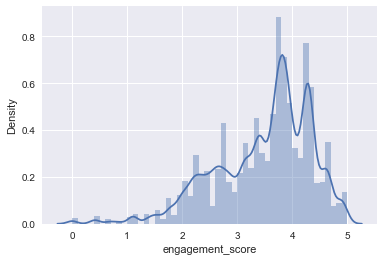

In [35]:
sns.distplot(df_train['engagement_score'])

<AxesSubplot:ylabel='Density'>

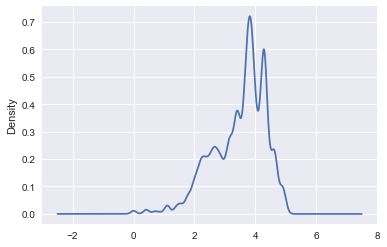

In [18]:
train['engagement_score'].plot(kind='kde')

## Target 1 : Create a sample model using decision tree


In [19]:
df.dtypes

row_id                int64
user_id               int64
category_id           int64
video_id              int64
age                   int64
gender               object
profession           object
followers             int64
views                 int64
engagement_score    float64
type                 object
dtype: object

In [20]:
pd.get_dummies(df)

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional,type_Test,type_Train
0,1,19990,37,128,24,180,1000,4.33,0,1,0,1,0,0,1
1,2,5304,32,132,14,330,714,1.79,1,0,0,1,0,0,1
2,3,1840,12,24,19,180,138,4.35,0,1,0,1,0,0,1
3,4,12597,23,112,19,220,613,3.77,0,1,0,1,0,0,1
4,5,13626,23,112,27,220,613,3.13,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100313,100314,26336,25,140,21,240,317,NaN,0,1,0,1,0,1,0
100314,100315,6772,8,100,19,280,628,NaN,1,0,0,1,0,1,0
100315,100316,2042,16,98,22,270,462,NaN,0,1,0,1,0,1,0
100316,100317,24626,8,16,33,280,628,NaN,0,1,1,0,0,1,0


In [21]:
df.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,type
0,1,19990,37,128,24,Male,Student,180,1000,4.33,Train
1,2,5304,32,132,14,Female,Student,330,714,1.79,Train
2,3,1840,12,24,19,Male,Student,180,138,4.35,Train
3,4,12597,23,112,19,Male,Student,220,613,3.77,Train
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13,Train


In [26]:
le = LabelEncoder()
df['gender_en'] = le.fit_transform(df['gender'])

In [27]:
df['profession_en']= le.fit_transform(df['profession'])

In [28]:
df.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,type,gender_en,profession_en
0,1,19990,37,128,24,Male,Student,180,1000,4.33,Train,1,1
1,2,5304,32,132,14,Female,Student,330,714,1.79,Train,0,1
2,3,1840,12,24,19,Male,Student,180,138,4.35,Train,1,1
3,4,12597,23,112,19,Male,Student,220,613,3.77,Train,1,1
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13,Train,1,2


In [29]:
df[['gender','profession','engagement_score']].groupby(['gender','profession']).mean()

engagement_score
gender profession                            
Female Other                         2.911770
       Student                       3.315377
       Working Professional          2.680369
Male   Other                         3.629037
       Student                       4.031785
       Working Professional          3.388415

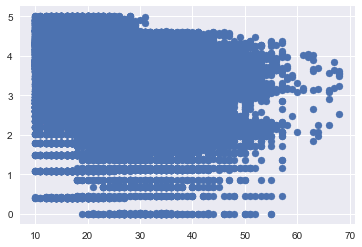

In [30]:
plt.scatter(df['age'], df['engagement_score'])

(array([  226.,     0.,   311.,   166.,   117.,   626.,   354.,   513.,
         1180.,  1410.,  2666.,  4449.,  2685.,  5917.,  2816.,  5036.,
         6181.,  5073., 12062., 10934.,  5396., 12114.,  3165.,  3800.,
         2000.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 25 artists>)

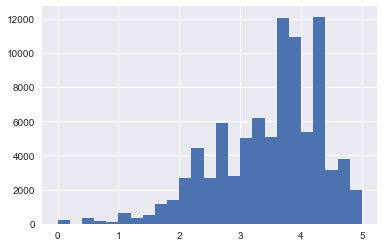

In [31]:
plt.hist(df['engagement_score'], bins=25)

(array([14898., 29130., 18785., 18365., 11556.,  5446.,  1624.,   415.,
           69.,    30.]),
 array([10. , 15.8, 21.6, 27.4, 33.2, 39. , 44.8, 50.6, 56.4, 62.2, 68. ]),
 <BarContainer object of 10 artists>)

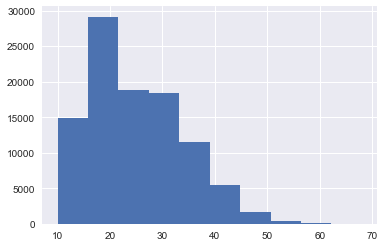

In [32]:
plt.hist(df['age'], bins=10) # 10 is minumn age and 68 is maximum age

In [33]:
df[['age','engagement_score']].groupby(['age']).mean().sort_values

<bound method DataFrame.sort_values of      engagement_score
age                  
10           3.724508
11           3.705260
12           3.754144
13           3.726920
14           3.746523
15           3.742823
16           3.717820
17           3.739467
18           3.700154
19           3.701378
20           3.650948
21           3.604618
22           3.589410
23           3.536934
24           3.454467
25           3.424450
26           3.346669
27           3.295289
28           3.272013
29           3.282994
30           3.305020
31           3.264692
32           3.267886
33           3.268186
34           3.233514
35           3.262015
36           3.223874
37           3.242357
38           3.255696
39           3.290533
40           3.241360
41           3.195947
42           3.208711
43           3.187939
44           3.226303
45           3.124882
46           3.172099
47           3.034545
48           3.055178
49           3.133664
50           2.988779
51           2.

In [34]:
bins= [10,20,30,40,50,60,70]
labels = ['teen','young','adult','mid','old','senior']
df['ageGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df.ageGroup.value_counts()

teen      34882
young     33883
adult     25353
mid        5498
old         662
senior       40
Name: ageGroup, dtype: int64

In [35]:
df.tail()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,type,gender_en,profession_en,ageGroup
100313,100314,26336,25,140,21,Male,Student,240,317,NaN,Test,1,1,young
100314,100315,6772,8,100,19,Female,Student,280,628,NaN,Test,0,1,teen
100315,100316,2042,16,98,22,Male,Student,270,462,NaN,Test,1,1,young
100316,100317,24626,8,16,33,Male,Other,280,628,NaN,Test,1,0,adult
100317,100318,967,8,74,33,Male,Working Professional,280,628,NaN,Test,1,2,adult


In [36]:
df[df.age>60]

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,type,gender_en,profession_en,ageGroup
3816,3817,1195,42,135,66,Female,Working Professional,290,689,3.57,Train,0,2,senior
4628,4629,27040,9,142,63,Female,Working Professional,230,819,3.13,Train,0,2,senior
14277,14278,14915,16,97,68,Female,Working Professional,270,462,3.23,Train,0,2,senior
21150,21151,14915,16,34,68,Female,Working Professional,270,462,3.50,Train,0,2,senior
26554,26555,19094,25,138,63,Male,Working Professional,240,317,4.01,Train,1,2,senior
27649,27650,12749,37,108,64,Female,Working Professional,180,1000,2.06,Train,0,2,senior
28221,28222,1195,42,134,66,Female,Working Professional,290,689,3.09,Train,0,2,senior
29701,29702,8409,13,29,67,Male,Working Professional,340,628,3.19,Train,1,2,senior
32158,32159,12749,35,106,64,Female,Working Professional,260,134,3.69,Train,0,2,senior
32655,32656,14915,15,33,68,Female,Working Professional,340,662,3.54,Train,0,2,senior


In [37]:
df.category_id.value_counts() ## 47 categories of videos

5     9593
8     7688
25    5841
19    5775
11    4740
4     4499
12    4412
21    4228
34    3979
16    3968
32    3137
13    2913
23    2671
18    2428
31    2369
42    2364
15    2334
9     2045
7     2044
1     1975
3     1845
6     1399
39    1339
10    1321
28    1309
17    1208
26    1156
27    1103
36    1025
43    1019
29     993
35     986
37     962
20     702
30     548
41     545
14     536
38     534
24     524
33     517
40     458
22     366
46     253
45     227
44     226
2      167
47      47
Name: category_id, dtype: int64

In [38]:
df[['user_id','engagement_score']].groupby(['user_id']).mean() # 27734 users

,engagement_score
user_id,
1,3.140000
2,3.082000
3,4.377500
4,4.153333
5,4.185000
...,...
27730,2.056667
27731,2.350000
27732,3.860000


In [39]:
df.user_id.value_counts() ##maximum numbers of revies by a user is 12 and minimum review is 2

9898     12
13410    11
19970    11
5198     11
20608    11
         ..
20677     2
11157     2
20460     2
18856     2
11279     2
Name: user_id, Length: 27734, dtype: int64

In [40]:
train.user_id.value_counts() # train maximum 10 reviews , minimun 2

5198     10
13218    10
1448     10
13410    10
7157     10
         ..
21507     2
4404      2
21430     2
17541     2
11279     2
Name: user_id, Length: 27734, dtype: int64

In [41]:
test.user_id.value_counts() # test maximum 3 reviews , minimun 1

23132    3
19954    3
18192    3
17821    3
9898     3
        ..
15795    1
14588    1
4303     1
8608     1
967      1
Name: user_id, Length: 10384, dtype: int64

In [42]:
df[df.user_id == 9898]

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,type,gender_en,profession_en,ageGroup
143,144,9898,34,114,28,Male,Other,230,840,3.91,Train,1,0,young
744,745,9898,16,137,28,Male,Other,270,462,4.45,Train,1,0,young
6866,6867,9898,32,92,28,Male,Other,330,714,3.93,Train,1,0,young
19329,19330,9898,34,95,28,Male,Other,230,840,3.53,Train,1,0,young
31525,31526,9898,34,115,28,Male,Other,230,840,4.47,Train,1,0,young
32560,32561,9898,16,98,28,Male,Other,270,462,4.28,Train,1,0,young
40021,40022,9898,16,97,28,Male,Other,270,462,4.33,Train,1,0,young
46695,46696,9898,34,96,28,Male,Other,230,840,4.51,Train,1,0,young
64615,64616,9898,32,133,28,Male,Other,330,714,3.43,Train,1,0,young
97007,97008,9898,16,34,28,Male,Other,270,462,NaN,Test,1,0,young


In [43]:
train[['user_id','gender']].groupby(['gender']).nunique() # 59.98 % Male

,user_id
gender,
Female,11099
Male,16635


In [44]:
test[['user_id','gender']].groupby(['gender']).nunique() # 57.867% male

,user_id
gender,
Female,4375
Male,6009


## Train and Test data mostly seems to be balanced



In [45]:
df.dtypes

row_id                 int64
user_id                int64
category_id            int64
video_id               int64
age                    int64
gender                object
profession            object
followers              int64
views                  int64
engagement_score     float64
type                  object
gender_en              int32
profession_en          int32
ageGroup            category
dtype: object

In [47]:
df['ageGroup_en'] = le.fit_transform(df['ageGroup'])
df.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,type,gender_en,profession_en,ageGroup,ageGroup_en
0,1,19990,37,128,24,Male,Student,180,1000,4.33,Train,1,1,young,5
1,2,5304,32,132,14,Female,Student,330,714,1.79,Train,0,1,teen,4
2,3,1840,12,24,19,Male,Student,180,138,4.35,Train,1,1,teen,4
3,4,12597,23,112,19,Male,Student,220,613,3.77,Train,1,1,teen,4
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13,Train,1,2,young,5


In [53]:
df['activity_rate'] = df['views']/df['followers']

In [54]:
df.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,type,gender_en,profession_en,ageGroup,ageGroup_en,activity_rate
0,1,19990,37,128,24,Male,Student,180,1000,4.33,Train,1,1,young,5,5.555556
1,2,5304,32,132,14,Female,Student,330,714,1.79,Train,0,1,teen,4,2.163636
2,3,1840,12,24,19,Male,Student,180,138,4.35,Train,1,1,teen,4,0.766667
3,4,12597,23,112,19,Male,Student,220,613,3.77,Train,1,1,teen,4,2.786364
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13,Train,1,2,young,5,2.786364


In [57]:
df[df.category_id == 47]  # Number of followers are as per category

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,type,gender_en,profession_en,ageGroup,ageGroup_en,activity_rate
1286,1287,5582,47,175,22,Male,Student,260,248,4.54,Train,1,1,young,5,0.953846
2414,2415,7609,47,175,22,Male,Student,260,248,3.80,Train,1,1,young,5,0.953846
3588,3589,26169,47,175,18,Male,Student,260,248,4.23,Train,1,1,teen,4,0.953846
6855,6856,21796,47,175,14,Female,Student,260,248,3.83,Train,0,1,teen,4,0.953846
10225,10226,8178,47,175,23,Male,Student,260,248,3.80,Train,1,1,young,5,0.953846
13413,13414,23401,47,175,33,Male,Other,260,248,3.93,Train,1,0,adult,0,0.953846
13468,13469,20828,47,175,16,Female,Student,260,248,0.42,Train,0,1,teen,4,0.953846
15592,15593,24776,47,175,15,Male,Student,260,248,3.77,Train,1,1,teen,4,0.953846
19310,19311,19399,47,175,18,Male,Student,260,248,4.62,Train,1,1,teen,4,0.953846
19382,19383,12162,47,175,11,Male,Student,260,248,3.77,Train,1,1,teen,4,0.953846


In [58]:
df.followers.value_counts()

230    19749
240    17217
280     8934
180     7802
270     7669
250     6507
320     5331
340     5247
210     4154
260     3417
330     3137
220     2838
290     2364
160     2044
360     1975
200     1680
190      253
Name: followers, dtype: int64

In [59]:
df[df.followers == 180]['category_id'].value_counts()  # Number of followers are as per category min dollowers 160 , max followers 360

12    4412
18    2428
37     962
Name: category_id, dtype: int64

In [60]:
df.views/df.followers

0         5.555556
1         2.163636
2         0.766667
3         2.786364
4         2.786364
            ...   
100313    1.320833
100314    2.242857
100315    1.711111
100316    2.242857
100317    2.242857
Length: 100318, dtype: float64

In [61]:
df[df.followers == 200]['category_id'].value_counts()  # Number of followers are as per category min dollowers 160 , max followers 360

26    1156
24     524
Name: category_id, dtype: int64

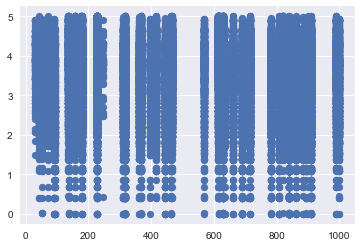

In [62]:
plt.scatter(df['views'], df['engagement_score']) ## probably no correlation between number of views and engagement score

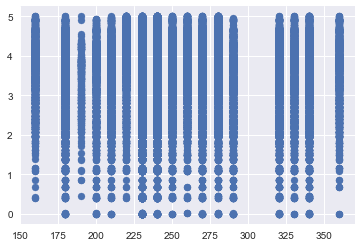

In [63]:
plt.scatter(df['followers'], df['engagement_score'])

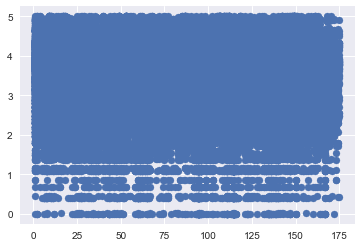

In [64]:
plt.scatter(df['video_id'], df['engagement_score'])

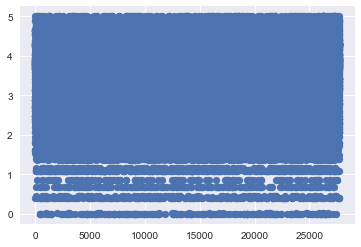

In [65]:
plt.scatter(df['user_id'], df['engagement_score'])

In [67]:
df1 = pd.get_dummies(df)

In [68]:
df1.head()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score,gender_en,profession_en,...,profession_Student,profession_Working Professional,type_Test,type_Train,ageGroup_teen,ageGroup_young,ageGroup_adult,ageGroup_mid,ageGroup_old,ageGroup_senior
0,1,19990,37,128,24,180,1000,4.33,1,1,...,1,0,0,1,0,1,0,0,0,0
1,2,5304,32,132,14,330,714,1.79,0,1,...,1,0,0,1,1,0,0,0,0,0
2,3,1840,12,24,19,180,138,4.35,1,1,...,1,0,0,1,1,0,0,0,0,0
3,4,12597,23,112,19,220,613,3.77,1,1,...,1,0,0,1,1,0,0,0,0,0
4,5,13626,23,112,27,220,613,3.13,1,2,...,0,1,0,1,0,1,0,0,0,0


In [69]:
test_df = df1[df1.type_Test==1]
train_df = df1[df1.type_Train==1]

In [70]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89197 entries, 0 to 89196
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   row_id                           89197 non-null  int64  
 1   user_id                          89197 non-null  int64  
 2   category_id                      89197 non-null  int64  
 3   video_id                         89197 non-null  int64  
 4   age                              89197 non-null  int64  
 5   followers                        89197 non-null  int64  
 6   views                            89197 non-null  int64  
 7   engagement_score                 89197 non-null  float64
 8   gender_en                        89197 non-null  int32  
 9   profession_en                    89197 non-null  int32  
 10  ageGroup_en                      89197 non-null  int32  
 11  activity_rate                    89197 non-null  float64
 12  gender_Female     

In [71]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11121 entries, 89197 to 100317
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   row_id                           11121 non-null  int64  
 1   user_id                          11121 non-null  int64  
 2   category_id                      11121 non-null  int64  
 3   video_id                         11121 non-null  int64  
 4   age                              11121 non-null  int64  
 5   followers                        11121 non-null  int64  
 6   views                            11121 non-null  int64  
 7   engagement_score                 0 non-null      float64
 8   gender_en                        11121 non-null  int32  
 9   profession_en                    11121 non-null  int32  
 10  ageGroup_en                      11121 non-null  int32  
 11  activity_rate                    11121 non-null  float64
 12  gender_Female

In [72]:
train_df.columns

Index(['row_id', 'user_id', 'category_id', 'video_id', 'age', 'followers',
       'views', 'engagement_score', 'gender_en', 'profession_en',
       'ageGroup_en', 'activity_rate', 'gender_Female', 'gender_Male',
       'profession_Other', 'profession_Student',
       'profession_Working Professional', 'type_Test', 'type_Train',
       'ageGroup_teen', 'ageGroup_young', 'ageGroup_adult', 'ageGroup_mid',
       'ageGroup_old', 'ageGroup_senior'],
      dtype='object')

In [74]:
columns = ['user_id', 'category_id', 'video_id', 'age', 'followers',
       'views','gender_en', 'profession_en']

In [76]:
train_df = train_df[columns]

test_df = test_df[columns]

In [77]:
train_df.head()

,user_id,category_id,video_id,age,followers,views,gender_en,profession_en
0,19990,37,128,24,180,1000,1,1
1,5304,32,132,14,330,714,0,1
2,1840,12,24,19,180,138,1,1
3,12597,23,112,19,220,613,1,1
4,13626,23,112,27,220,613,1,2


In [78]:
test_df.head()

,user_id,category_id,video_id,age,followers,views,gender_en,profession_en
89197,7986,12,42,14,180,138,1,1
89198,11278,34,115,14,230,840,1,1
89199,17245,8,110,44,280,628,0,2
89200,9851,16,137,18,270,462,1,1
89201,16008,34,96,47,230,840,0,0


In [79]:
train_df.shape, test_df.shape

((89197, 8), (11121, 8))

In [80]:
X = train_df.copy()

In [81]:
y = train['engagement_score']

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [89]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((66897, 8), (22300, 8), (66897,), (22300,))

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [115]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [116]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [117]:
rf.feature_importances_

array([0.36155217, 0.04549591, 0.10335778, 0.18799239, 0.02389987,
       0.06081572, 0.16697492, 0.04991122])

In [118]:
# ['user_id', 'category_id', 'video_id', 'age', 'followers',
#       'views','gender_en', 'profession_en']

In [119]:
rf.n_estimators

100

In [120]:
sample_in = rf.predict(X_train)

In [121]:
print (mse(y_train, sample_in))
print(r2(y_train, sample_in))

0.06627007089734964
0.9111206077218733


In [122]:
y_pred_rf = rf.predict(X_test)


In [123]:
mse(y_test, y_pred_rf)

0.47746866538968613

In [124]:
r2(y_test, y_pred_rf)

0.35963089951038507

In [125]:
y_pred_rf

array([3.6001, 4.1838, 3.7276, ..., 4.271 , 2.0948, 3.3622])

In [126]:
y_observed_rf = rf.predict(test_df)

In [127]:
y_observed_rf

array([4.0653, 3.2144, 2.7846, ..., 3.1307, 3.8332, 2.8585])

In [128]:
y_observed_df = pd.DataFrame(y_observed_rf, columns=['engage_score'])
sub['engagement_score']=y_observed_df['engage_score']
print(sub.head())
sub.to_csv('submission9.csv',index=False)

   row_id  engagement_score
0   89198            4.0653
1   89199            3.2144
2   89200            2.7846
3   89201            3.2080
4   89202            1.3127


#### randomforest submission resulted in score of 0.244135862520767 while r2 score for validation set was 0.35963089951038507m